# Teste: Dedo x Metal


In [37]:
#Instalando bibliotecas

%pip install matplotlib
%pip install pandas feather-format
%pip install numpy
%pip install scikit-learn



Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [67]:
#Importando bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [86]:
#Ler os dados que estão no arquivo feather e mostrar eles

df1 = pd.read_feather(r"C:\Users\jpsfb\OneDrive\Área de Trabalho\LINSE - LAB\MedicaoDEDOjoao.feather")
#1 é dedo
#print(df1.head())
#print(df1.tail())
#print(df1.sample())
display(df1.describe())


,time,dac1,dac2,dac3,dac4,imu1accx,imu1accy,imu1accz,imu1gyrox,imu1gyroy,imu1gyroz,imu2accx,imu2accy,imu2accz,imu2gyrox,imu2gyroy,imu2gyroz
count,124792.000000,124792.0,124792.0,124792.0,124792.0,124792.000000,124792.000000,124792.000000,124792.000000,124792.000000,124792.000000,124792.000000,124792.000000,124792.000000,124792.000000,124792.000000,124792.000000
mean,299.997564,0.0,0.0,0.0,0.0,0.856618,19.551479,0.740569,1.866581,-3.740061,-4.493866,-1.670485,19.392886,0.969144,2.511848,-6.669598,-2.479387
std,173.205756,0.0,0.0,0.0,0.0,0.275232,0.168409,1.749063,2.925041,0.316832,0.080097,0.549420,0.440526,3.066959,4.329607,0.489503,0.130623
min,0.000000,0.0,0.0,0.0,0.0,-16.024392,12.427104,-30.725987,-25.859833,-13.656616,-5.458832,-29.062017,8.911219,-39.202658,-37.853241,-23.071289,-4.226685
25%,149.998782,0.0,0.0,0.0,0.0,0.843956,19.536686,0.565032,1.300812,-3.837585,-4.547119,-1.685518,19.366697,0.469264,1.720428,-6.790161,-2.532959
50%,299.997564,0.0,0.0,0.0,0.0,0.855927,19.553445,0.738611,1.869202,-3.742218,-4.493713,-1.669956,19.389442,0.967257,2.513885,-6.668091,-2.479553
75%,449.996346,0.0,0.0,0.0,0.0,0.869095,19.566613,0.913388,2.429962,-3.643036,-4.444122,-1.655590,19.413384,1.472434,3.311157,-6.549835,-2.426147
max,599.995128,0.0,0.0,0.0,0.0,15.957354,26.736050,30.891187,26.268005,6.416321,-3.448486,24.529793,34.432211,39.221812,40.531158,10.463715,-0.820160


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


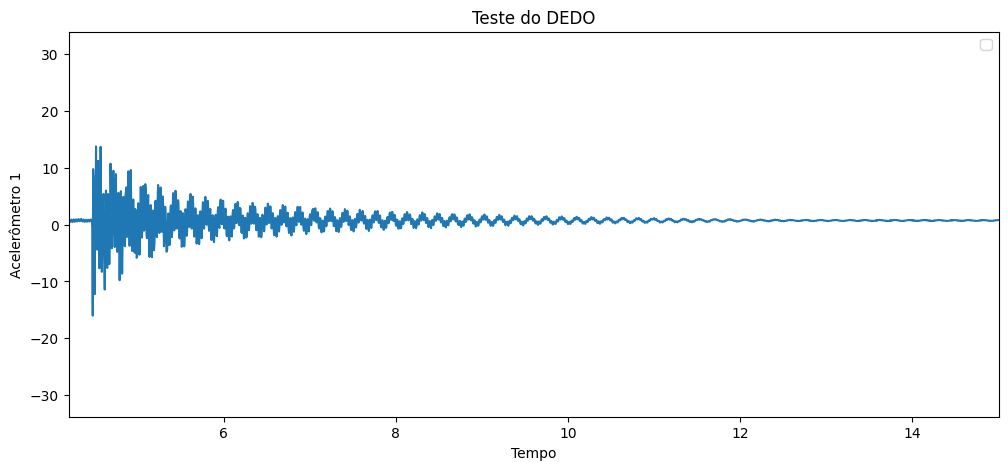

In [85]:
x = df1['time'].values.reshape(-1, 1)
y = df1['imu1accz'].values

# Transformação polinomial de grau 2 dos recursos
poly_features = PolynomialFeatures(degree=2)
x_poly = poly_features.fit_transform(x)

# Ajustar o modelo de regressão linear aos recursos polinomiais
model = LinearRegression()
model.fit(x_poly, y)

# Prever os valores
y_pred = model.predict(x_poly)

# Plotar os dados e a curva de regressão
plt.plot(df1['time'], df1['imu1accz'])
# plt.plot([0, 600], [0, 30], color='red', label='Curva de Regressão Polinomial')
plt.xlabel('Tempo')
plt.ylabel('Acelerômetro 1')
plt.title('Teste do DEDO')
plt.legend()
plt.gcf().set_size_inches(12,5)
plt.xlim(4.2,15)
plt.show()

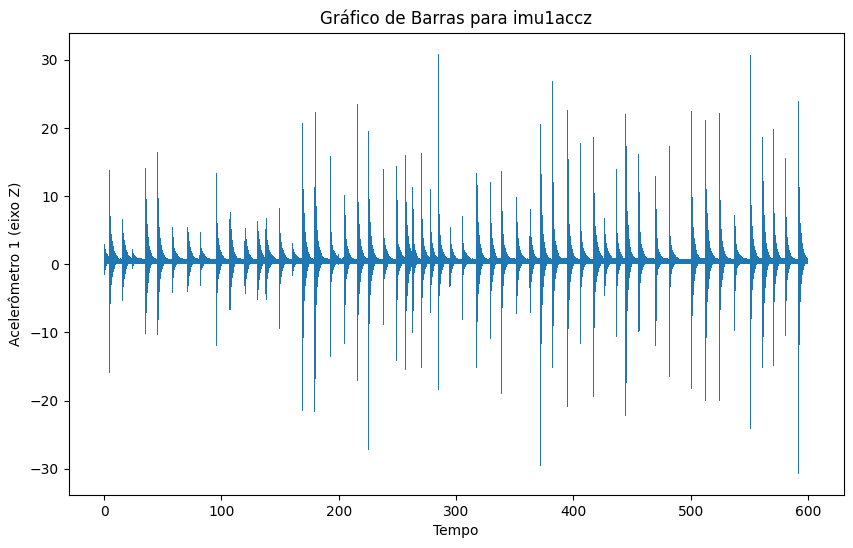

In [66]:
# Colunas que você deseja plotar
columns_to_plot = ['imu1accz']

# Criar gráficos de barras para as colunas
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))  # Define o tamanho da figura
    plt.bar(df1['time'], df1[column])  # Cria um gráfico de barras
    plt.xlabel('Tempo')
    plt.ylabel('Acelerômetro 1 (eixo Z)')  # O rótulo do eixo y será o nome da coluna
    plt.title(f'Gráfico para Acelerômetro 1')
    plt.show()

In [68]:
#Algoritmo do Scikit-learn
# Calcular estatísticas descritivas para a coluna 'imu1accz'
imu1accz_data = df1['imu1accz'].values.reshape(-1, 1)

scaler = StandardScaler()
imu1accz_scaled = scaler.fit_transform(imu1accz_data)

# Estatísticas descritivas após escalonamento
print("Média:", imu1accz_scaled.mean())
print("Desvio Padrão:", imu1accz_scaled.std())
print("Valor Mínimo:", imu1accz_scaled.min())
print("Valor Máximo:", imu1accz_scaled.max())


Média: -1.0085172292415198e-17
Desvio Padrão: 0.9999999999999999
Valor Mínimo: -17.990596607246754
Valor Máximo: 17.238226533967776
